In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# Merge the 12 month file

In [2]:
files= [file for file in os.listdir('./Sales_Data')]
all_month_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_month_data=pd.concat([all_month_data , df])

all_month_data.to_csv('Full_data', index=False)

### this is 12 month full Data , updated data frame

In [3]:
df=pd.read_csv('Full_data') 

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data cleaning 

### Find NaN values in there

In [5]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
nan_df = df[df.isna().any(axis=1)]

In [7]:
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


### Drop NaN values

In [8]:
df= df.dropna(how='all')

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' Error 

In [10]:
df1= df[df['Order Date'].str[0:2]=='Or']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Delete 'Or' Error

In [11]:
df= df[df['Order Date'].str[0:2]!='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Convert column to the correct type

In [12]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered']) # make it int
df['Price Each']=pd.to_numeric(df['Price Each']) # to float

# Task 2: Add the month column 

### Error 1: invalid literal for int() with base 10: 'Or' We got this error when we change the type of month str into int32 and we fixed it

In [13]:
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


# Task 3: Add the Sales column

### Error 2: can't multiply sequence by non-int of type 'str'

In [14]:
df['Sales']= df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Task 3: Add the City column

In [15]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


df['City']=df['Purchase Address'].apply(lambda x:get_city(x)+ ' '+ get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


# Question 1: What was the best month for sales? How much was earned that month?

Text(0.5, 1.0, 'Sales per Month')

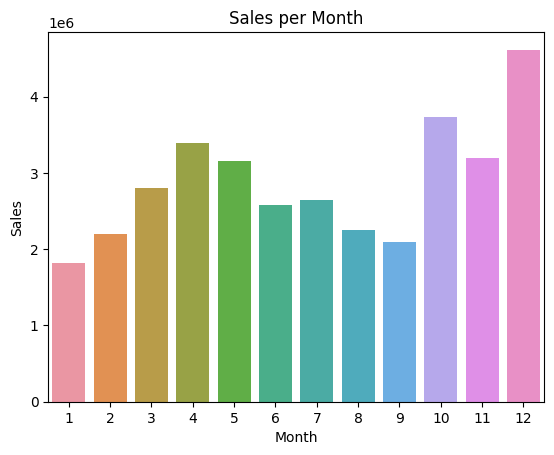

In [16]:
group_by_month=df.groupby(['Month'] , as_index=False)['Sales'].sum().sort_values(by='Sales' , ascending=False)

sns.barplot(data=group_by_month , x='Month' , y='Sales').set_title('Sales per Month')

## Alternate way 

In [17]:
groupby_month=df.groupby('Month').sum()


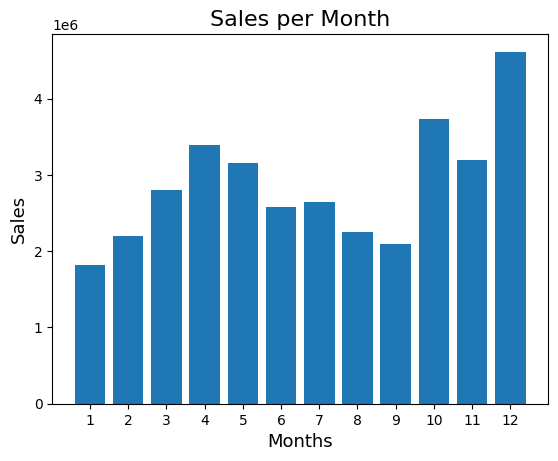

In [18]:
Month=range(1,13) # 13 is excluded i.e 1 to 12
plt.bar(Month , groupby_month['Sales'])
plt.xlabel('Months' , size=13)
plt.ylabel('Sales' , size=13)
plt.title('Sales per Month' , size=16)
plt.xticks(Month)
plt.show()

## ANS: 
1. April
2. October
3. November
4. December 

# Question 2:What city sold the most product?

Text(0.5, 1.0, 'Sales in City')

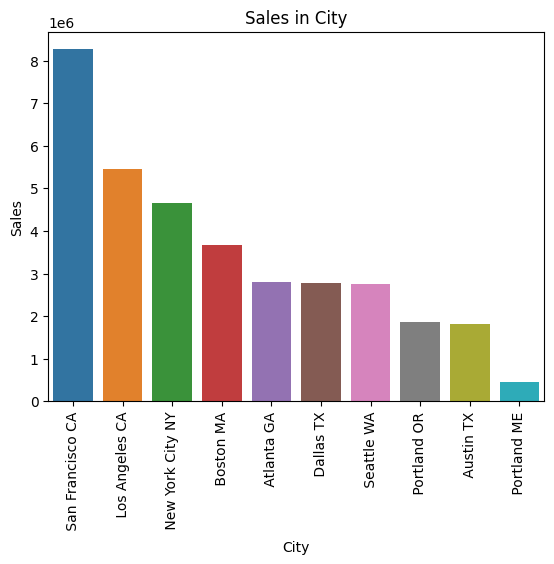

In [19]:
group_by_city=df.groupby(['City'] , as_index=False)['Sales'].sum().sort_values(by='Sales' , ascending=False)
plt.xticks(rotation=90)
sns.barplot(data=group_by_city , x='City' , y='Sales').set_title('Sales in City')

In [20]:
murge_city=df.groupby('City').sum()
murge_city

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City NY,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland ME,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland OR,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco CA,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


## Alternate way

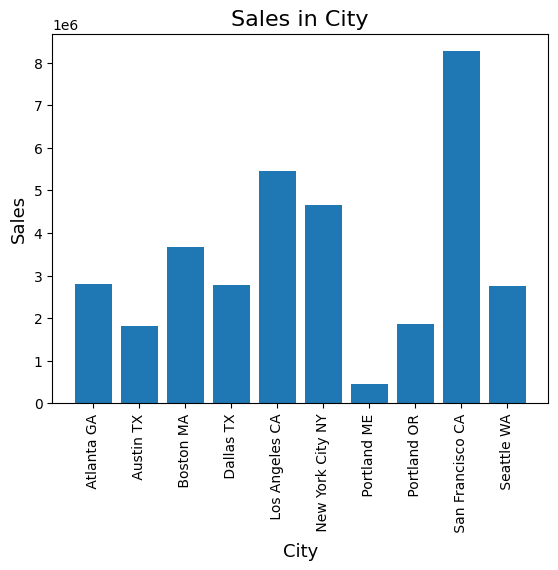

In [22]:
cities=[ i for i, df in df.groupby('City')] 
plt.bar(cities , murge_city['Sales'])     
plt.xlabel('City' , size=13)               
plt.ylabel('Sales' , size=13)               
plt.title('Sales in City' , size=16)       
plt.xticks(cities , rotation='vertical')   
plt.show()    

## ANS: 
1. San Francisco CA 
2. Los Angeles CA
3. New York City NY

# Question 3: What products are most often sold together? 

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [24]:
df1=df[df['Product'].duplicated(keep=False)]
df1['Grouped']=df1.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))
df1= df1[['Order ID' , 'Grouped']].drop_duplicates()
df1

,Order ID,Grouped
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone , Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable
...,...,...
186845,259353,AAA Batteries (4-pack)
186846,259354,iPhone
186847,259355,iPhone
186848,259356,34in Ultrawide Monitor


In [25]:
from itertools import combinations
from collections import Counter

In [26]:
count = Counter()
for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))

count.most_common(12)

[(('iPhone ', ' Lightning Charging Cable'), 886),
 (('Google Phone ', ' USB-C Charging Cable'), 859),
 (('iPhone ', ' Wired Headphones'), 443),
 (('Google Phone ', ' Wired Headphones'), 405),
 (('iPhone ', ' Apple Airpods Headphones'), 329),
 (('Vareebadd Phone ', ' USB-C Charging Cable'), 312),
 (('Google Phone ', ' Bose SoundSport Headphones'), 192),
 (('Vareebadd Phone ', ' Wired Headphones'), 140),
 (('Google Phone ', ' USB-C Charging Cable '), 128),
 (('iPhone ', ' Lightning Charging Cable '), 119),
 ((' USB-C Charging Cable ', ' Wired Headphones'), 114),
 (('Vareebadd Phone ', ' Bose SoundSport Headphones'), 74)]

## iPhone and Lightning Charging Cable ------> 886 

## Google Phone and USB-C Charging Cable ------> 859

## iPhone and Wired Headphones ------> 443

## Google Phone and Wired Headphones ------> 405

# Question 4: What product sold the most? Why do you think it did?

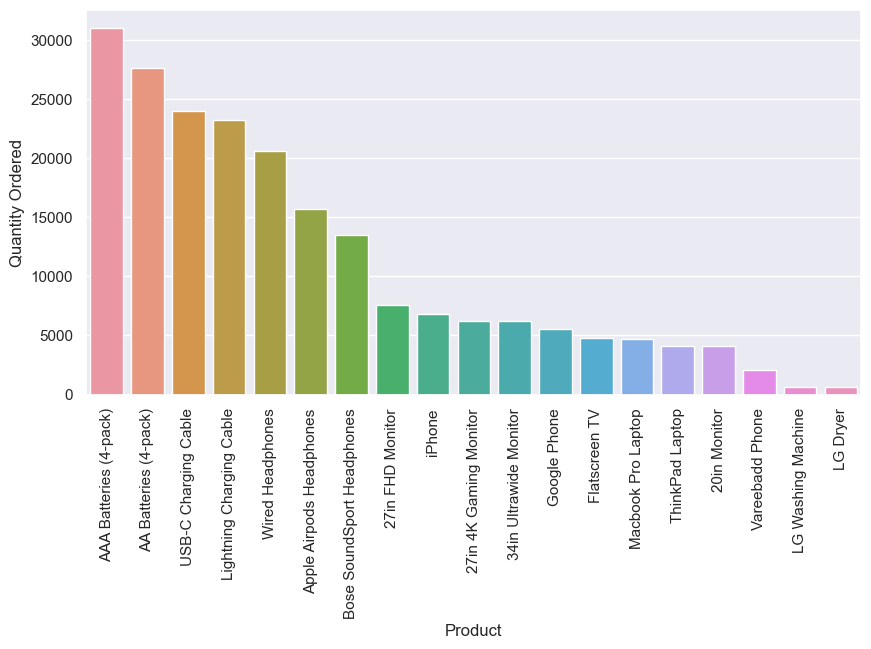

In [27]:
pqo=df.groupby(['Product'] , as_index=False)['Quantity Ordered'].sum().sort_values(by='Quantity Ordered' , ascending=False)
sns.set(rc={'figure.figsize': (10 , 5)})
sns.barplot( data=pqo ,x='Product' , y='Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


## Alternate way

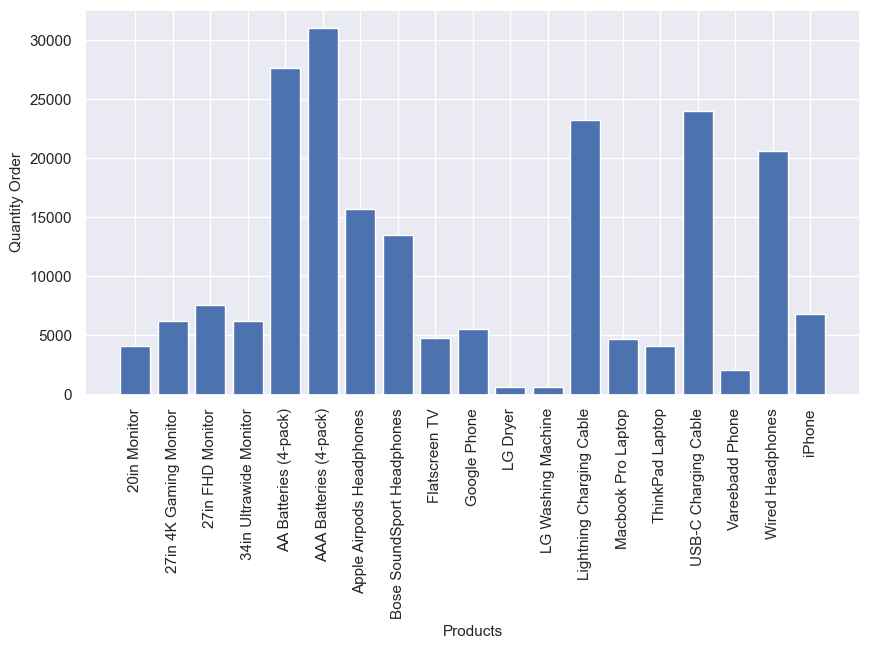

In [29]:
product_group = df.groupby('Product')
quantity_order = product_group.sum()['Quantity Ordered']
products = [i for i , df1 in product_group ]
plt.bar(products , quantity_order )
plt.xticks(products , rotation='vertical')
plt.ylabel('Quantity Order' , size=11)
plt.xlabel('Products', size=11)
plt.show()

##  The most sold products are AAA Batteries, AA Batteries , USB Charging cable  , Lighting charging cable 

## Reason : people are buying iphones tends to buy  USB Charging cable , Lighting charging cable

##  AAA Batteries, AA Batteries are used in tv remotes and we can see that there are lots of TV sold

# Question 5: What time should we display advertisements to maximize the likelihood of purchases?

In [30]:
df['Order Date']= pd.to_datetime(df['Order Date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_15688\3163393989.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']= pd.to_datetime(df['Order Date'])


In [31]:
df['Hour']= df['Order Date'].dt.hour
df['Minute']= df['Order Date'].dt.minute
df['Count']=1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,1


### convert normal order date(str) to actual datetime

<Axes: xlabel='Hour', ylabel='Quantity Ordered'>

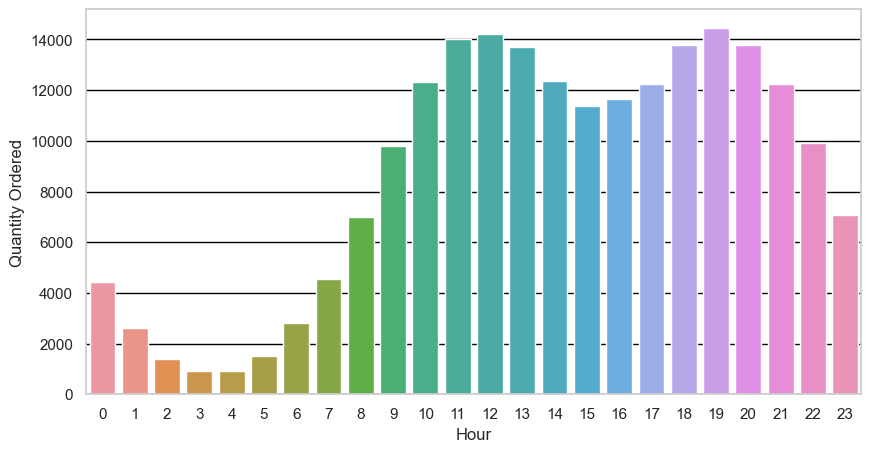

In [32]:
sns.set_style("whitegrid" , {'grid.color': 'black'})
hw=df.groupby(['Hour'] , as_index=False)['Quantity Ordered'].sum().sort_values(by='Quantity Ordered')

sns.barplot(data=hw , x='Hour' , y='Quantity Ordered')

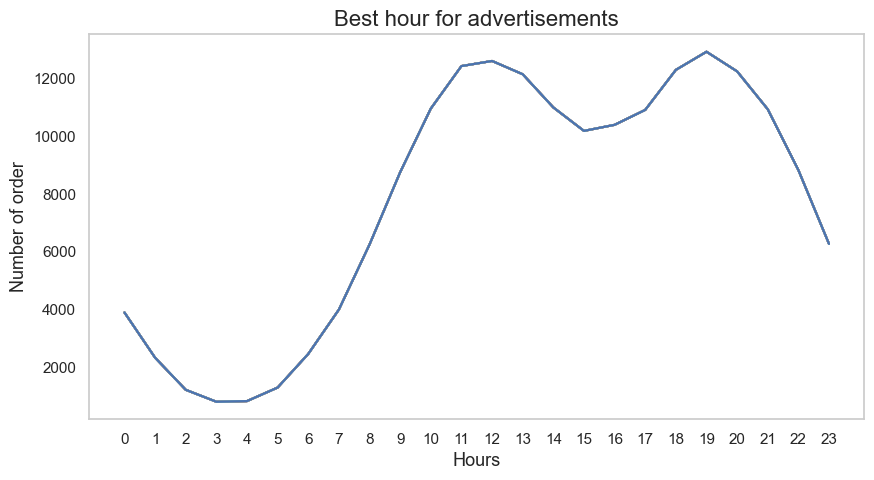

In [33]:
Hours=[ i for i, df in df.groupby('Hour')] 
        
plt.plot(Hours , df.groupby(['Hour']).count())  

plt.xlabel('Hours' , size=13)  
plt.ylabel('Number of order' , size=13)  
plt.title('Best hour for advertisements' , size=16)       
plt.xticks(Hours ) 
plt.grid()
plt.show()   
# my recommendation is around 11am to 7pm

# my recommendation is around 11am to 7pm